In [1]:
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
sns.color_palette('Spectral')
import matplotlib.pyplot as plt

import numpy as np
import requests
import pandas as pd
import re

from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait

In [2]:
data = pd.read_csv('../datos/AncestryDNA.txt', sep='\t', dtype={'rsid':'str', 'chromosome':'object', 'position':'int', 'genotype':'str'}, comment='#')

print(data)
data.head()

               rsid chromosome  position allele1 allele2
0         rs3131972          1    752721       A       G
1       rs114525117          1    759036       A       G
2         rs4040617          1    779322       A       A
3       rs141175086          1    780397       C       C
4       rs115093905          1    787173       0       0
...             ...        ...       ...     ...     ...
677859   rs41534744         26     16129       A       A
677860   rs41419246         26     16145       G       G
677861   rs41466049         26     16162       A       A
677862   rs41355449         26     16327       C       C
677863  rs869031877         26     16391       G       G

[677864 rows x 5 columns]


,rsid,chromosome,position,allele1,allele2
0,rs3131972,1,752721,A,G
1,rs114525117,1,759036,A,G
2,rs4040617,1,779322,A,A
3,rs141175086,1,780397,C,C
4,rs115093905,1,787173,0,0


In [3]:
df = pd.DataFrame(data)
df.head()

,rsid,chromosome,position,allele1,allele2
0,rs3131972,1,752721,A,G
1,rs114525117,1,759036,A,G
2,rs4040617,1,779322,A,A
3,rs141175086,1,780397,C,C
4,rs115093905,1,787173,0,0


In [4]:
df.isna().any()

rsid          False
chromosome    False
position      False
allele1       False
allele2       False
dtype: bool

In [5]:
df.nunique()

rsid          677864
chromosome        26
position      675918
allele1            7
allele2            7
dtype: int64

In [6]:
Y_chromosome = df[df.chromosome == 'Y']

len(Y_chromosome)

0

In [7]:
df['chromosome'].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26'], dtype=object)

In [8]:
df['chromosome'] = df['chromosome'].apply(lambda x: re.sub(r'X', r'23', x))
df['chromosome'] = df['chromosome'].apply(lambda x: re.sub(r'MT', r'24', x))

df['chromosome'] = df['chromosome'].apply(lambda x: int(x))


chromosome_dict = {1:'1', 2:'2', 3:'3', 4:'4', 5:'5', 
                   6:'6', 7:'7', 8:'8', 9:'9', 10:'10', 
                   11:'11', 12:'12', 13:'13', 14:'14', 
                   15:'15', 16:'16', 17:'17', 18:'18', 
                   19:'19', 20:'20', 21:'21', 22:'22', 
                   23:'X', 24:'MT'}

print(chromosome_dict)

{1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: '10', 11: '11', 12: '12', 13: '13', 14: '14', 15: '15', 16: '16', 17: '17', 18: '18', 19: '19', 20: '20', 21: '21', 22: '22', 23: 'X', 24: 'MT'}


In [9]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 677864 entries, 0 to 677863
Data columns (total 5 columns):
rsid          677864 non-null object
chromosome    677864 non-null int64
position      677864 non-null int64
allele1       677864 non-null object
allele2       677864 non-null object
dtypes: int64(2), object(3)
memory usage: 25.9+ MB


None

In [10]:
df[df.chromosome == 1].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50578 entries, 0 to 50577
Data columns (total 5 columns):
rsid          50578 non-null object
chromosome    50578 non-null int64
position      50578 non-null int64
allele1       50578 non-null object
allele2       50578 non-null object
dtypes: int64(2), object(3)
memory usage: 2.3+ MB


In [11]:
# Remove that pesky whitespace from the column name
df.rename({' rsid': 'rsid'}, axis='columns', inplace=True)

# How many SNPs are there per chromosome?

# We can do this manually with a for loop . . .
x = []
y = []
for k in chromosome_dict:
    x.append(k)
    y.append(len(df[df.chromosome == k]))
rsid_per_chromosome = dict(zip(x,y))


rsid_per_chromosome

{1: 50578,
 2: 54882,
 3: 43326,
 4: 36872,
 5: 38822,
 6: 43333,
 7: 34641,
 8: 32983,
 9: 29633,
 10: 32789,
 11: 32544,
 12: 31312,
 13: 24933,
 14: 21140,
 15: 21358,
 16: 23368,
 17: 22908,
 18: 18997,
 19: 16983,
 20: 18079,
 21: 10172,
 22: 10994,
 23: 25250,
 24: 1668}

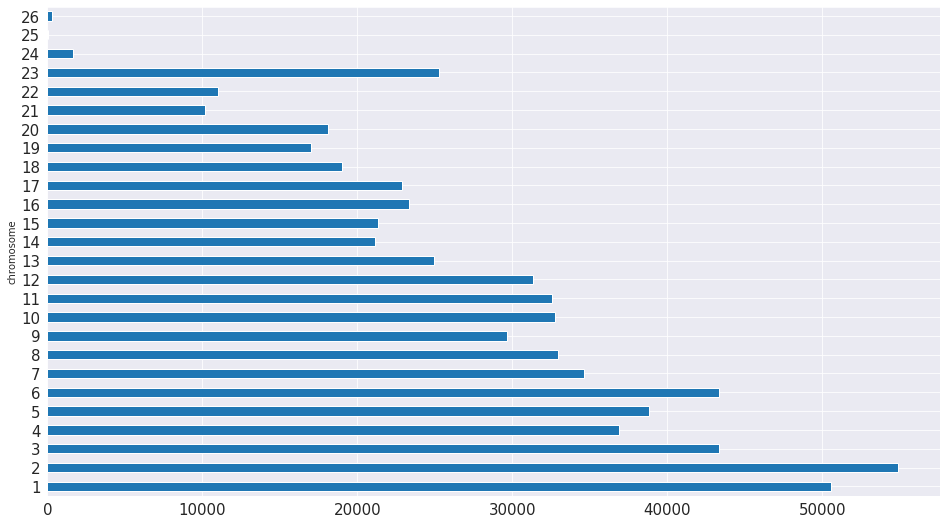

In [12]:
rsid_per_chromosome_series = df.groupby('chromosome')['rsid'].count()
rsid_per_chromosome_series.columns = ['chromosome', 'count']


rsid_per_chromosome_series.plot.barh(figsize=(16,9), fontsize=15)
plt.show()

In [13]:
snp_df = pd.read_csv('result.csv')
snp_df.head()

,Unnamed: 0,Magnitude,Repute,Summary
0,Rs661(A;A),9.0,Bad,early onset Alzheimer's disease
1,Rs6647(T;T),0.0,Good,Normal; two copies of Pi-M1V allele
2,Rs6647(C;C),0.0,Good,Normal; two copies of Pi-M1A allele
3,Rs1303(T;T),0.0,Good,common in clinvar
4,Rs28929471(G;G),0.0,Good,common in complete genomics


In [14]:
snp_df['genotype'] = snp_df['Unnamed: 0'].apply(lambda x: re.sub(r'.*([AGCT]);([AGCT])\)', r'\1\2', x))

In [15]:
new_cols = ['rsid', 'magnitude', 'repute', 'summary', 'genotype']
snp_df.columns = new_cols

In [16]:
snp_df['rsid'] = snp_df['rsid'].map(lambda x : x.lower())
snp_df['rsid'] = snp_df['rsid'].map(lambda x : re.sub(r'([a-z]{1,}[\d]+)\([agct];[agct]\)', r'\1', x))

In [17]:
null_repute = snp_df[snp_df['repute'].isnull()]
null_summaries = snp_df[snp_df['summary'].isnull()]
null_repute_and_summaries = pd.concat([null_repute,null_summaries]).drop_duplicates().reset_index(drop=True)
display(null_repute_and_summaries)
snp_df['repute'].fillna(value='Neutral', inplace=True)
snp_df['summary'].fillna(value='None', inplace=True)
# No no NaNette
snp_df.isna().any()

,rsid,magnitude,repute,summary,genotype
0,rs28931569,4.0,NaN,high risk of emphysema,CC
1,rs28929473,0.0,NaN,NaN,TT
2,rs28931572,0.0,NaN,NaN,AA
3,rs1801252,3.0,NaN,NaN,GG
4,rs8192466,4.0,NaN,uncertain,TT
5,rs4986852,2.0,NaN,predisposition to breast cancer?,AA
6,rs1800709,2.0,NaN,predisposition to breast cancer?,TT
7,rs28931592,0.0,NaN,NaN,TT
8,rs4986893,2.1,NaN,poor metabolizer of several commonly prescribe...,AA


rsid         False
magnitude    False
repute       False
summary      False
genotype     False
dtype: bool

In [18]:
df['genotype'] = df['allele1'] + df['allele2']
df.tail()

,rsid,chromosome,position,allele1,allele2,genotype
677859,rs41534744,26,16129,A,A,AA
677860,rs41419246,26,16145,G,G,GG
677861,rs41466049,26,16162,A,A,AA
677862,rs41355449,26,16327,C,C,CC
677863,rs869031877,26,16391,G,G,GG


In [19]:
snp_df.tail()

,rsid,magnitude,repute,summary,genotype
95,rs6166,1.0,Bad,Females slightly more likely to be sterile,GG
96,rs6166,0.0,Good,common/normal,AA
97,rs28928870,0.0,Good,common in clinvar,CC
98,rs28928871,0.0,Good,common in clinvar,GG
99,rs17855739,0.0,Good,common in clinvar,GG


In [20]:
new_df = snp_df.merge(df, how='inner', on=['rsid', 'genotype'], suffixes=('_SNPedia', '_myDNA'))


In [21]:
new_df.head(20)

,rsid,magnitude,repute,summary,genotype,chromosome,position,allele1,allele2
0,rs17580,2.5,Bad,a slightly reduced functionality form of Alpha...,TT,14,94847262,T,T
1,rs28931572,0.0,Neutral,None,AA,14,94849228,A,A
2,rs769455,0.0,Good,common in clinvar,CC,19,45412040,C,C
3,rs28931576,0.0,Good,common in clinvar,AA,19,45411151,A,A
4,rs28931579,0.0,Good,common in clinvar,AA,19,45412493,A,A
5,rs28931580,0.0,Good,common in clinvar,AA,12,50344783,A,A
6,rs4987076,0.0,Good,common in clinvar,GG,8,18080001,G,G
7,rs28929478,0.0,Good,common in clinvar,GG,12,110719662,G,G
8,rs28931581,0.0,Good,common in clinvar,CC,9,35792499,C,C
9,rs28929479,0.0,Good,common in clinvar,TT,9,35792933,T,T


In [22]:
# Create a DataFrame for some subsets of genes
good_genes = new_df[new_df.repute == 'Good']
bad_genes = new_df[new_df.repute == 'Bad']
interesting_genes = new_df[new_df.magnitude > 4] # 4 is the threshold for "worth your time" given by SNPedia


In [23]:
good_genes

,rsid,magnitude,repute,summary,genotype,chromosome,position,allele1,allele2
2,rs769455,0.0,Good,common in clinvar,CC,19,45412040,C,C
3,rs28931576,0.0,Good,common in clinvar,AA,19,45411151,A,A
4,rs28931579,0.0,Good,common in clinvar,AA,19,45412493,A,A
5,rs28931580,0.0,Good,common in clinvar,AA,12,50344783,A,A
6,rs4987076,0.0,Good,common in clinvar,GG,8,18080001,G,G
7,rs28929478,0.0,Good,common in clinvar,GG,12,110719662,G,G
8,rs28931581,0.0,Good,common in clinvar,CC,9,35792499,C,C
9,rs28929479,0.0,Good,common in clinvar,TT,9,35792933,T,T
10,rs28931586,0.0,Good,common in clinvar,TT,20,44750988,T,T
11,rs1800888,0.0,Good,normal,CC,5,148206885,C,C


In [24]:
bad_genes

,rsid,magnitude,repute,summary,genotype,chromosome,position,allele1,allele2
0,rs17580,2.5,Bad,a slightly reduced functionality form of Alpha...,TT,14,94847262,T,T
13,rs28931590,2.5,Bad,ACUTE MYELOID LEUKEMIA,TT,19,33793070,T,T
15,rs5882,2.0,Bad,Faster aging. Increased risk for Dementia. Les...,AA,16,57016092,A,A


In [27]:
interesting_genes

,rsid,magnitude,repute,summary,genotype,chromosome,position,allele1,allele2


In [26]:

# Get the base URL from SNPedia
base_url = 'https://www.snpedia.com/index.php/'
# Create URLs for each gene that I want to study
gene_urls = [base_url + rsid for rsid in bad_genes['rsid']]
# Initialize Selenium
browser = webdriver.Chrome()
import time
# Write a function to visit the SNPedia URLs, click through to PubMed, 
# and retrieve the info on the articles for each gene
def scrape_abstracts(urls):
    
    rsid_list = []
    all_article_title = []
    all_article_citation = []
    all_article_authors = []
    all_article_abstract = []
    all_article_links = []
    for url in urls:
        link_urls = []
        browser.get(url) #load url
        rsid = browser.find_element_by_css_selector('.firstHeading').text
        links_elements = browser.find_elements_by_partial_link_text('PMID')
        
        # get the URLs to the PubMed pages
        for link in links_elements:
            link_urls.append(link.get_attribute('href')) 
    
        # follow each link element to PubMed
        for element in link_urls:
            browser.get(element) 
            time.sleep(2)
            article_title = browser.find_element_by_xpath("//div[@class='cit']/../h1").text
            article_citation = browser.find_element_by_class_name('cit').text
            article_authors = browser.find_element_by_class_name('auths').text
            article_abstract = browser.find_element_by_class_name('abstr').text
            
            rsid_list.append(rsid)
            all_article_title.append(article_title)
            all_article_citation.append(article_citation)
            all_article_authors.append(article_authors)
            all_article_abstract.append(article_abstract)
            all_article_links.append(element)
    # store the information
    df = pd.DataFrame()
    df['rsid'] = rsid_list
    df['article_title'] = all_article_title
    df['article_citation'] = all_article_citation
    df['article_authors'] = all_article_authors
    df['article_abstract'] = all_article_abstract
    df['link'] = all_article_links
        
    df = df.drop_duplicates()
        
    df.index = range(len(df.index))
    
    return df
abstracts_df = scrape_abstracts(gene_urls)

WebDriverException: Message: chrome not reachable
  (Session info: chrome=79.0.3945.88)
